# Praca domowa 3
#### Mateusz Grzyb

## Zbiór danych

Autor: Joe Young, Adam Young

Nazwa: weatherAUS

Źródło: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## Opis zbioru i zmiennych

### Opis

"This dataset contains about 10 years of daily weather observations from numerous Australian weather stations. The target RainTomorrow means: Did it rain the next day? Yes or No."

### Zmienne:

- **MinTemp** - Minimalna temperatura [C]
- **MaxTemp** - Maksymalna temperatura [C]
- **Rainfall** - Suma opadów [mm]
- **Evaporation** - Miara odparowywania [mm]
- **Sunshine** - Suma czasu nasłonecznienia [h]
- **WindGustSpeed** - Najwyższa prędkość wiatru [km/h]
- **WindSpeed9am** - Prędkość wiatru o 9:00 [km/h]
- **WindSpeed3pm** - Prędkość wiatru o 15:00 [km/h]
- **Humidity9am** - Wilgotność o 9:00 [%]
- **Humidity3pm** - Wilgotność o 15:00 [%]
- **Pressure9am** - Ciśnienie atmosferyczne o 9:00 [hPa]
- **Pressure3pm** - Ciśnienie atmosferyczne o 15:00 [hPa]
- **Cloud9am** - Zachmurzenie o 9:00 [skala: 0 - słońce, 8 - całkowite zachmurzenie]
- **Cloud3pm** - Zachmurzenie o 15:00 [skala: 0 - słońce, 8 - całkowite zachmurzenie]
- **Temp9am** - Temperatura o 9:00 [C]
- **Temp3pm** - Temperatura o 15:00 [C]
- **RainToday** - Czy dzisiaj padał deszcz [0 - nie, 1 - tak]
-  **Zmienna celu:** **RainTomorrow** - Czy jutro będzie padał deszcz [0 - nie, 1 - tak]

### Uwaga
"You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. Read more about it here."

W otrzymanym przez nas zbiorze danych już tej zmiennej nie ma, więc nie trzeba nic usuwać.

## Wczytanie bibliotek

In [4]:
import time

import numpy as np
import pandas as pd

from scipy import interp

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix

## Wczytanie danych

In [28]:
data=pd.read_csv('australia.csv')

data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


## Typy zmiennych i braki danych

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustSpeed    56420 non-null float64
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null int64
RainTomorrow     56420 non-null int64
dtypes: float64(16), int64(2)
memory usage: 7.7 MB


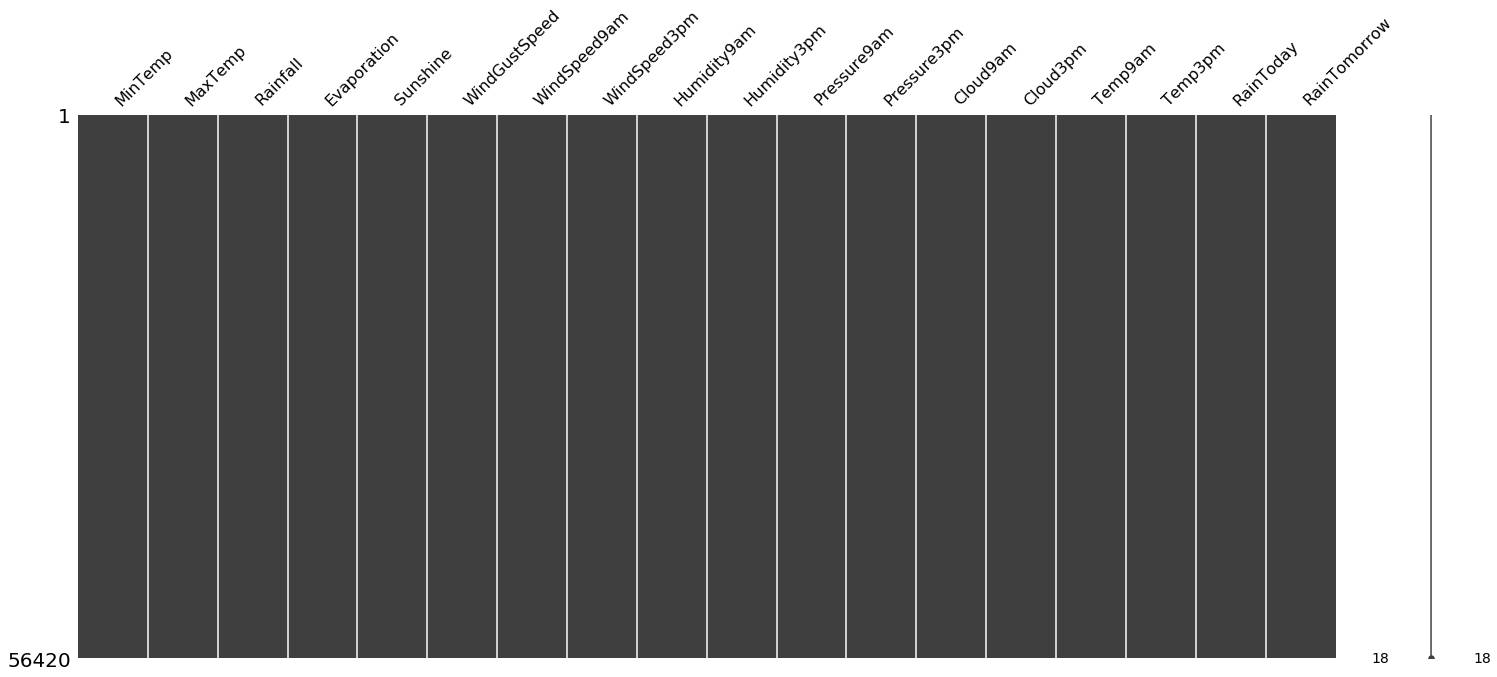

In [30]:
msno.matrix(data);

#### Komentarz

Dane obejmują 56420 obserwacji pogodowych. Kolumny są typów int i float, przeważają zmienne numeryczne. Nie występują braki danych.

## Krótka analiza zmiennych

### Rozkłady zmiennych kategorycznych

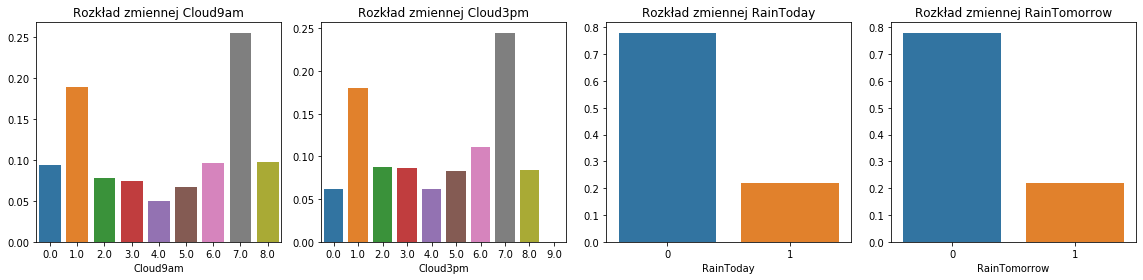

In [31]:
f, axes=plt.subplots(1, 4, figsize=(16, 4))

variables=['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']

for i in range(0, len(variables)):
    sns.barplot(data=data, x=variables[i], y=variables[i], estimator=lambda x: len(x)/len(data), ax=axes[i]).set_title('Rozkład zmiennej '+variables[i])
for ax in f.axes:
    ax.set_ylabel('')

plt.tight_layout();

#### Komentarz

* Stosunek dni deszczowych do niedeszczowych to 1:4 (niezrównoważenie klas w zmiennej celu),

* rozkłady zachmurzenia są dwumodalne, najpowszechniejsze wartości to 1 i 7

Jedna obserwacja Cloud3pm wykracza poza określoną skalę (skala to 0-8, jest 9). Zamienię tę wartość na 8:

In [32]:
(data[data.Cloud3pm>8])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
42587,10.6,24.6,0.2,11.6,11.4,39.0,26.0,17.0,45.0,13.0,1019.0,1015.2,6.0,9.0,14.8,23.7,0,0


In [33]:
data.loc[data.Cloud3pm>8, 'Cloud3pm']=8

### Rozkłady zmiennych liczbowych

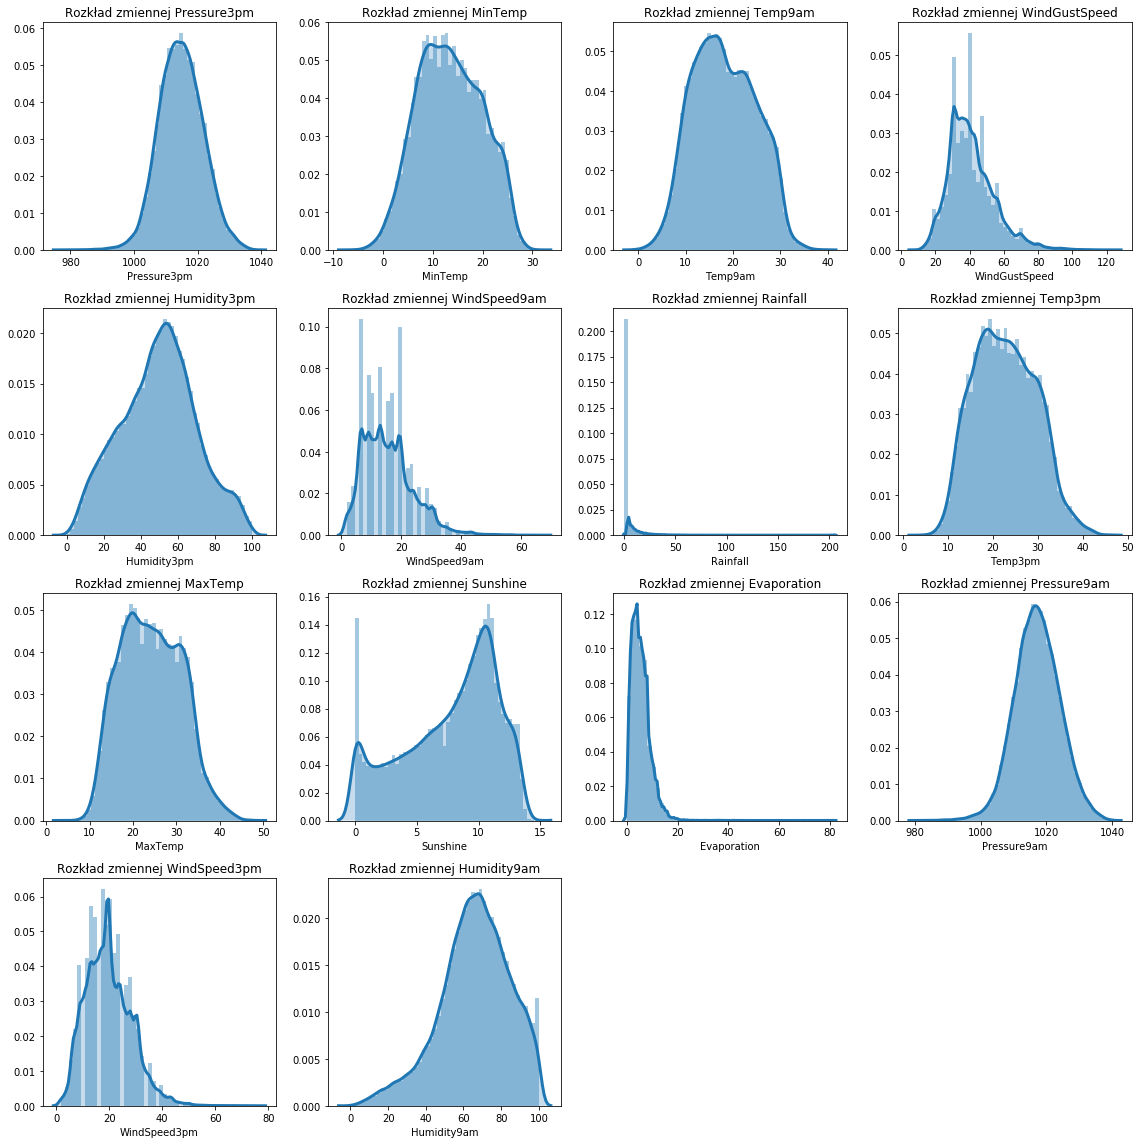

In [41]:
f, axes = plt.subplots(4, 4, figsize=(16, 16), sharey=False)

variables=list(set(list(data.columns))-set(['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']))

for i in range(0, len(variables)):
    sns.distplot(data[variables[i]], hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3}, ax=axes[i//4, i%4]).set_title('Rozkład zmiennej '+variables[i])
for i in range(14, 16):
    f.delaxes(axes[i//4, i%4])
        
plt.tight_layout();

#### Komentarz
Prawie wszystkie rozkłady są "ładne", ale...

#### Dygresja
... możnaby pokusić się o przekształcenie logarytmiczne zmiennej Rainfall/Evaporate. Jednak problem stanowi duża ilość wartości 0. Spróbujmy zatem przekształcenia pierwsiastkowego:

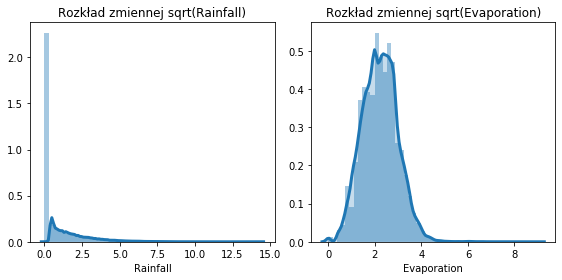

In [66]:
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

variables=['Rainfall', 'Evaporation']

for i in range(0, len(variables)):
    sns.distplot(np.sqrt(data[variables[i]]), hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3}, ax=axes[i]).set_title('Rozkład zmiennej sqrt('+variables[i]+')')
        
plt.tight_layout();

Wygląda to nieco lepiej. Spróbujmy jeszcze przekształcenia log(x+1):

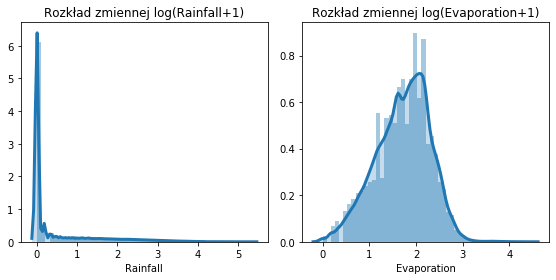

In [71]:
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=False)

variables=['Rainfall', 'Evaporation']

for i in range(0, len(variables)):
    sns.distplot(np.log(data[variables[i]]+1), hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3}, ax=axes[i]).set_title('Rozkład zmiennej log('+variables[i]+'+1)')
        
plt.tight_layout();

Wygląda to jeszcze lepiej. Nie jestem jednak pewien, czy powinienem dodawać stałą, do zmiennej, w której znaczną większość obserwacji stanowią wartości 0. W związku z tym, nie będę transformował danych przed uczeniem (w miarę możliwości, proszę o komentarz w tej kwestii).

## Korelacje zmiennych

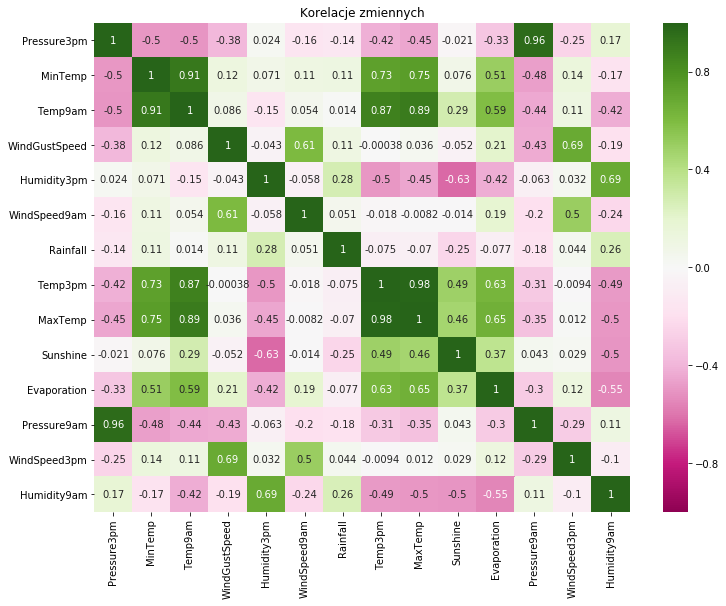

In [72]:
variables=list(set(list(data.columns))-set(['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']))
corr=data.loc[:, variables].corr()
fig, ax=plt.subplots(figsize=(12,9))  
ax=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="PiYG", center=0, vmin=-1, vmax=1)
ax.set_title('Korelacje zmiennych')
plt.show();

#### Komentarz
Występuje wiele silnych skorelowań, niektóre z nich są dosyć intuicyjne - np. zmienna Temp3pm jest mocno skorelowana ze zmienną MaxTemp, zmienna Temp9am też, ale trochę słabiej, niż zmienna Temp3pm (co ma sens, sczytowe temperatury występują popołudniu, a nie rano).

## Przygotowanie do uczenia maszynowego

### Wybrane algorytmy

Zdecydowałem się na użycie następujących algorytmów:

* Logistic Regression (z parametrem max_iter=1500, 15xDefault)

* Random Forest (z parametrem n_estimators=200,  2xDefault)

* XGBoost (z parametrem learning_rate=0.5, 5xDefault)

### Metryki

Zdecydowałem się na użycie następujących metryk:

* Balanced Accuracy (z racji na dysproporcję klas w zmiennej celu)

* ROC Curve i powiązane AUC

* F1 (średnia harmoniczna Precision i Recall)

Oprócz tego przedstawię macierze błędów, a także czas wykonania kodu (wraz z działaniem funkcji testujących, więc jest to tylko poglądowy wynik do celów porównawczych).

### Podział zbioru

Dla metryk BACC, ROC, AUC i F1 używam metody kroswalidacji. Posługuję się funkcją StratifiedKFold, zachowującą proporcje klas przy podziałach.

Dla macierzy błędów używam sztywnego podziału zbioru. Posługuję się funkcją train_test_split z parametrem stratify ustawionym na zmienną celu.

### Funkcje testujące

In [120]:
def cv_test(cv, classifier, X, y):
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
    
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    f1s = []
    baccs = []
    
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X.iloc[train, ], y.iloc[train, ])
        w=classifier.predict(X.iloc[test, ])
        viz=plot_roc_curve(classifier, X.iloc[test, ], y.iloc[test, ], name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax1)
        interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        f1=f1_score(y.iloc[test, ], classifier.predict(X.iloc[test, ]), zero_division=1)
        f1s.append(f1)
        ax2.scatter(x=1, y=f1, label=r'F1 fold %i (F1 = %0.2f)' % (i, f1), alpha=.3)
        
        bacc = balanced_accuracy_score(y.iloc[test, ], classifier.predict(X.iloc[test, ]))
        baccs.append(bacc)
        ax3.scatter(x=1, y=bacc, label=r'BACC fold %i (BACC = %0.2f)' % (i, bacc), alpha=.3)
        
    ax1.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr+std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr-std_tpr, 0)
    ax1.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

    ax1.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver operating characteristic")
    ax1.legend(loc="lower right")
    
    ax2.boxplot(f1s, widths=.8)
    ax2.scatter(x=1, y=np.mean(f1s), color='b', label=r'Mean F1 (F1 = %0.2f $\pm$ %0.2f)' % (np.mean(f1s), np.std(f1s)), alpha=.8, s=80)
    ax2.set(ylim=[-0.05, 1.05], xlim=[0, 3.5], title="F1 Score", ylabel='F1 Score')
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax2.legend(loc="lower right")
    
    ax3.boxplot(baccs, widths=.8)
    ax3.scatter(x=1, y=np.mean(baccs), color='b', label=r'Mean BACC (BACC = %0.2f $\pm$ %0.2f)' % (np.mean(baccs), np.std(baccs)), alpha=.8, s=80)
    ax3.set(ylim=[-0.05, 1.05], xlim=[0, 3.5], title="BACC Score", ylabel='BACC Score')
    ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax3.legend(loc="lower right")

In [249]:
def ct_test(classifier):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
    classifier.fit(X_train, y_train)
    disp=plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    disp.ax_.set_title('Confusion Matrix for RainTomorrow\n(normalized along horizontal axis)')

## Uczenie i testy

### Logistic Regression

Time taken : 9.948817253112793


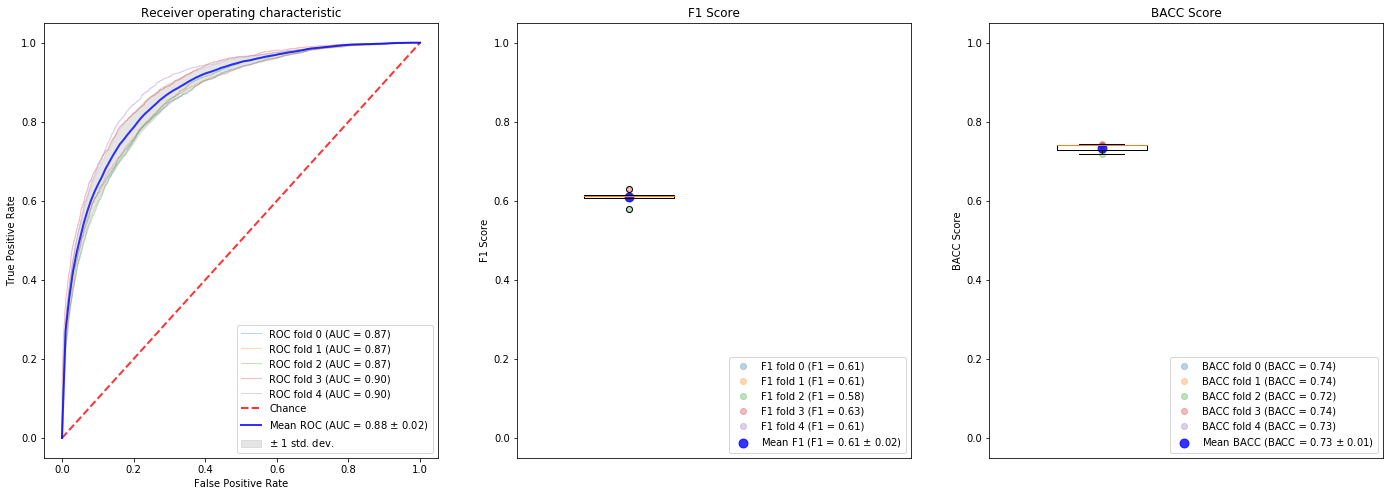

In [176]:
cv=StratifiedKFold(n_splits=5)
classifier=LogisticRegression(max_iter=1500)
X=data.drop('RainTomorrow', axis=1)
y=data['RainTomorrow']

t0=time.time()
cv_test(cv, classifier, X, y)
print('Time taken :' , time.time()-t0)

Time taken : 2.181609630584717


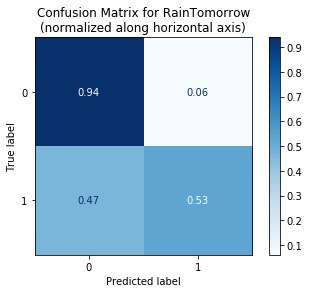

In [252]:
classifier=LogisticRegression(max_iter=1500)

t0=time.time()
ct_test(classifier)
print('Time taken :' , time.time()-t0)

### Random Forest

Time taken : 72.71801948547363


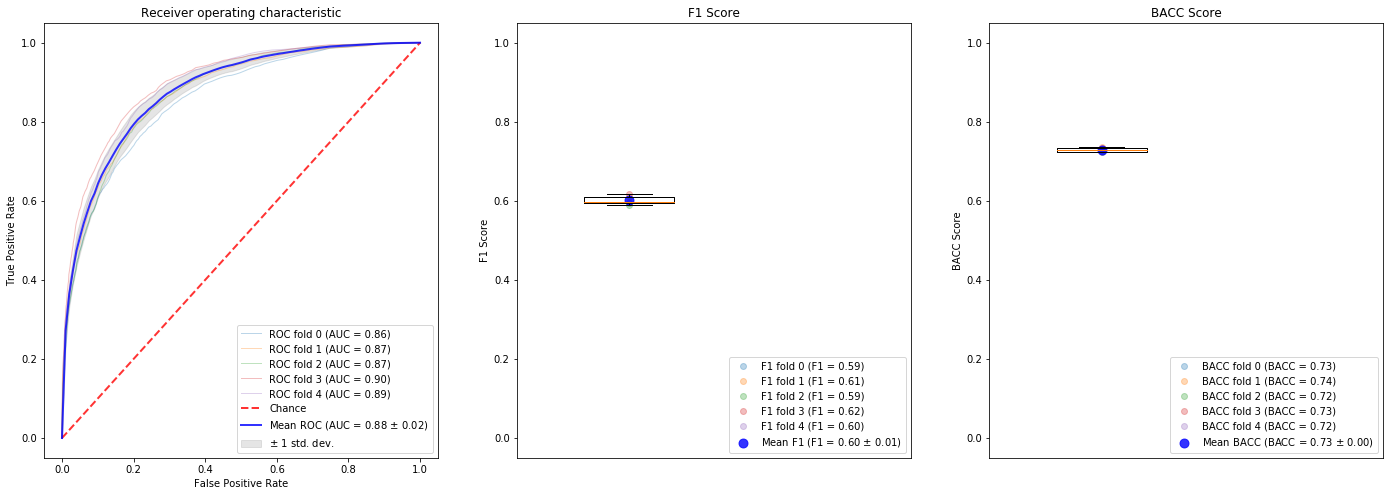

In [175]:
cut_data=data
cv=StratifiedKFold(n_splits=5)
classifier=RandomForestClassifier(random_state=1, n_estimators=200)
X=data.drop('RainTomorrow', axis=1)
y=data['RainTomorrow']

t0=time.time()
cv_test(cv, classifier, X, y)
print('Time taken :' , time.time()-t0)

Time taken : 13.81033444404602


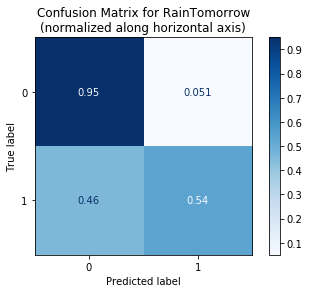

In [253]:
classifier=RandomForestClassifier(random_state=1, n_estimators=200)

t0=time.time()
ct_test(classifier)
print('Time taken :' , time.time()-t0)

### XGBoost

Time taken : 5.986844301223755


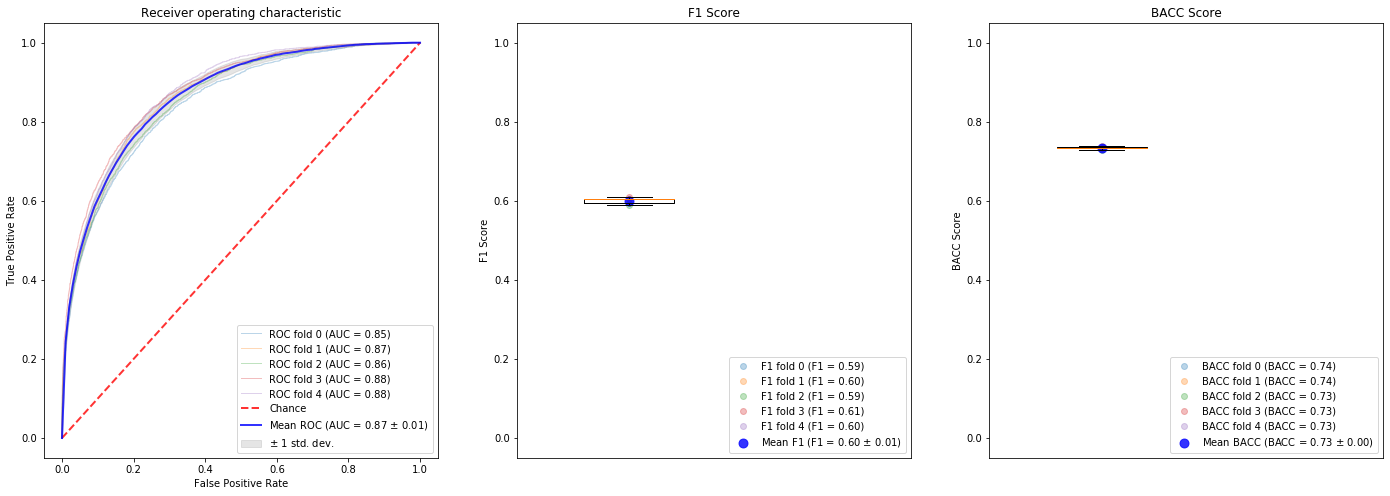

In [174]:
cut_data=data
cv=StratifiedKFold(n_splits=5)
classifier=XGBClassifier(random_state=1, learning_rate=0.5)
X=data.drop('RainTomorrow', axis=1)
y=data['RainTomorrow']

t0=time.time()
cv_test(cv, classifier, X, y)
print('Time taken :' , time.time()-t0)

Time taken : 1.2438194751739502


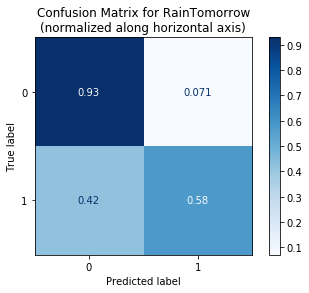

In [254]:
classifier=XGBClassifier(random_state=1, learning_rate=0.5)

t0=time.time()
ct_test(classifier)
print('Time taken :' , time.time()-t0)

## Wyniki
* Wszystkie modele radzą sobie w podobnym stopniu,
* wyniki są dobre, ale nie bardzo dobre,
* rozbieżności między iteracjami są małe,
* fałszywe przewidywania deszczu są bardzo rzadkie, ale jeśli deszcz dnia następnego występuje, to wykrywany jest w około 55% przypadków,
* "gładkość" krzywej ROC zdaje się świadczyć o rozmytej granicy między klasami,
* najszybszy jest XGBoost, zaraz za nim Logistic Regression, a na szarym końcu Random Forest

Wyniki tego eksperymentu są poniekąd "empirycznie zbieżne" z tym, jak często oszukiwała mnie prognoza pogody :). Oczywiście instytucje prognozujące pogodę (np. IMGW-PIB) posługują się znacznie bardziej wysublimowanymi metodami, jednak trafna prognoza w ujęciu długoterminowym jest dosłownie niemożliwa, co samo w sobie jest interesującym tematem (https://www.encyclopedia.com/environment/energy-government-and-defense-magazines/chaos-theory-and-meteorological-predictions).

W treści zadania jest mowa o wyborze **najlepszego modelu**. Różnice w wynikach są marginalne, więc decydująca staje się szybkość działania i tutaj wygrywa **XGBoost**.

# Część bonusowa

## Przygotowanie danych i testy

Najpierw doczytam biblioteki.

In [32]:
from sklearn.preprocessing import OneHotEncoder 

from category_encoders import TargetEncoder
from category_encoders import BinaryEncoder
from category_encoders import OrdinalEncoder

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Teraz wczytam dane.

In [36]:
data=pd.read_csv('allegro-api-transactions.csv')

data

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


Odrzucę zmienne, które nie powinny mieć wpływu na cenę.

In [38]:
data=data.drop(['lp', 'item_id'], axis=1)

Potecjalnie data powinna być związana z ceną i mógłbym przekonwertować ją na int/float, jednak jej zakres w zbiorze danych jest bardzo mały, dlatego ją też odrzucam.

In [37]:
print('Zakres zmiennej \'date\':'+min(data.date)+' - '+max(data.date))

Zakres zmiennej 'date':2016-04-03 00:00:09 - 2016-04-03 23:59:59


In [39]:
data=data.drop(['date'], axis=1)

Dokonam krótkiej analizy wybranych zmiennych.

In [44]:
variables=['seller', 'main_category', 'categories', 'it_location']

for variable in variables:
    print('Unikalne wartości w zmiennej \''+variable+'\': '+str(len(np.unique(data.loc[:, variable]))))

Unikalne wartości w zmiennej 'seller': 51064
Unikalne wartości w zmiennej 'main_category': 27
Unikalne wartości w zmiennej 'categories': 9020
Unikalne wartości w zmiennej 'it_location': 10056


Kodowanie zmiennej seller przerasta moc obliczeniową mojego komputera, dlatego ją odrzucę.

Dla zmiennej main_category zastosuje 3 rodzaje kodowania: One-Hot, Binary i Ordinal.

Dla zmiennych it_location i categories zastosuję Target Encoding. Najpierw jednak, dokonam podziału na zbiór treningowy i testowy, by uniknąć przecieku danych.

Niektóre kategorie i miejsowości występują w zbiorze bardzo rzadko (często z powodu błędów w pisowni), co nie pozwoli algorytmowi na nauczenie się wszystkich wartości imputacyjnych. Imputowana będzie wtedy wartość domyślna (średnia cena z wszystkich obserwacji). Jednak, by zminimalizować ten efekt, odrzucę bardzo małe grupy - nie spowoduje to utraty dużej ilości danych.

Gdyby zależałoby nam na pozostawieniu tych obserwacji, oczywiście moglibyśmy to zrobić. Jednak lepsze rozwiązanie, o ile byłoby to możliwe, stanowi zdobycie większej ilości danych.

In [11]:
# odrzucenie zmiennej seller
data=data.drop(['seller'], axis=1)

# ujednolicenie wielkosci liter w nazwach miejscowosci
data.it_location=data.it_location.str.lower()

# odrzucenie opisanych przypadkow
x=len(data)
print('Rozmiar danych przed przefiltrowaniem: '+str(x))
data=data.groupby('categories').filter(lambda x: len(x) >= 5)
data.reset_index(drop=True, inplace=True)
data=data.groupby('it_location').filter(lambda x: len(x) >= 5)
data.reset_index(drop=True, inplace=True)
y=len(data)
print('Rozmiar danych po przefiltrowaniu: '+str(y))
print('Utracono '+str(round((x-y)/x*100, 2))+'% danych')

Rozmiar danych przed przefiltrowaniem: 420020
Rozmiar danych po przefiltrowaniu: 406147
Utracono 3.3% danych


In [12]:
# One-Hot Encoding
data_ohe=data.copy()

ohe=OneHotEncoder(sparse=False)
temp=pd.DataFrame(ohe.fit_transform(data_ohe[['main_category']]))
temp.columns=ohe.get_feature_names(['main_category'])
data_ohe=pd.concat([data_ohe, temp], axis=1)

data_ohe=data_ohe.drop(['main_category'], axis=1)

# Binary Encoding
data_be=data.copy()

be=BinaryEncoder()
temp=be.fit_transform(data_be['main_category'])
data_be=pd.concat([data_be, temp], axis=1)

data_be=data_be.drop(['main_category'], axis=1)

# Ordinal Encoding
data_oe=data.copy()

oe=OrdinalEncoder()
data_oe['main_category_encoded']=oe.fit_transform(data_oe['main_category'])

data_oe=data_oe.drop(['main_category'], axis=1)

In [13]:
def prepare_data(data):
    # podzial na zbior treningowy i testowy
    y=data.price
    X=data.drop(['price'], axis=1)
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

    # target encoding zmiennej categories
    te1=TargetEncoder(handle_unknown='value', return_df=True)
    te1.fit(X_train['categories'], y_train)
    X_train.loc[:, 'categories_encoded']=te1.transform(X_train['categories']).categories
    X_test.loc[:, 'categories_encoded']=te1.transform(X_test['categories']).categories

    # target encoding zmiennej it_location
    te2=TargetEncoder(handle_unknown='value', return_df=True)
    te2.fit(X_train['it_location'], y_train)
    X_train.loc[:, 'it_location_encoded']=te2.transform(X_train['it_location']).it_location
    X_test.loc[:, 'it_location_encoded']=te2.transform(X_test['it_location']).it_location

    # odrzucenie kodowanych zmiennych
    X_train=X_train.drop(['categories', 'it_location'], axis=1)
    X_test=X_test.drop(['categories', 'it_location'], axis=1)

    return X_train, X_test, y_train, y_test

In [17]:
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe=prepare_data(data_ohe)
X_train_ohe

,pay_option_on_delivery,pay_option_transfer,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,main_category_Antyki i Sztuka,main_category_Bilety,main_category_Biuro i Reklama,main_category_Biżuteria i Zegarki,...,main_category_Przemysł,main_category_RTV i AGD,main_category_Rękodzieło,main_category_Sport i Turystyka,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Telefony i Akcesoria,main_category_Uroda,main_category_Zdrowie,categories_encoded,it_location_encoded
217036,1,1,1,98,0,3314,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.017296,27.377137
363549,1,1,1,902,0,154956,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.533377,47.031195
269880,1,1,1,121,0,12215,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.718926,73.338156
158961,1,1,1,179,0,1485,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.460260,35.241190
300183,1,0,1,131,0,29483,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.863023,67.120979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,1,1,0,97,0,15855,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.556124,50.175627
371403,1,1,1,913,0,6291,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.940011,115.197708
312201,0,1,1,5,0,20534,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.842688,99.817680
267336,0,0,0,0,0,514,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.419447,75.743121


In [18]:
X_train_be, X_test_be, y_train_be, y_test_be=prepare_data(data_be)
X_train_be

,pay_option_on_delivery,pay_option_transfer,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,categories_encoded,it_location_encoded
217036,1,1,1,98,0,3314,0,0,0,0,1,1,7.017296,27.377137
363549,1,1,1,902,0,154956,0,0,0,0,0,1,24.533377,47.031195
269880,1,1,1,121,0,12215,0,0,0,0,1,1,133.718926,73.338156
158961,1,1,1,179,0,1485,0,0,1,1,0,1,49.460260,35.241190
300183,1,0,1,131,0,29483,0,0,1,0,0,1,17.863023,67.120979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,1,1,0,97,0,15855,0,0,1,0,1,1,19.556124,50.175627
371403,1,1,1,913,0,6291,0,0,0,1,1,1,22.940011,115.197708
312201,0,1,1,5,0,20534,0,0,1,1,1,1,2.842688,99.817680
267336,0,0,0,0,0,514,0,0,0,1,1,0,6.419447,75.743121


In [19]:
X_train_oe, X_test_oe, y_train_oe, y_test_oe=prepare_data(data_oe)
X_train_oe

,pay_option_on_delivery,pay_option_transfer,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,main_category_encoded,categories_encoded,it_location_encoded
217036,1,1,1,98,0,3314,3,7.017296,27.377137
363549,1,1,1,902,0,154956,1,24.533377,47.031195
269880,1,1,1,121,0,12215,3,133.718926,73.338156
158961,1,1,1,179,0,1485,13,49.460260,35.241190
300183,1,0,1,131,0,29483,9,17.863023,67.120979
...,...,...,...,...,...,...,...,...,...
73349,1,1,0,97,0,15855,11,19.556124,50.175627
371403,1,1,1,913,0,6291,7,22.940011,115.197708
312201,0,1,1,5,0,20534,15,2.842688,99.817680
267336,0,0,0,0,0,514,6,6.419447,75.743121


Dane są już gotowe. Teraz stworzę funkcję uczącą i testującą model.

In [20]:
def test(regressor, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train)
    prediction=regressor.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test, prediction))
    
    R2=r2_score(y_test, prediction)
    
    print('RMSE wynosi: '+str(RMSE))
    print('R2 wynosi: '+str(R2))

Pora na testy. Zacznę od **XGBoost:**

In [102]:
regressor=XGBRegressor(random_state=1)
t0=time.time()
test(regressor, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)
print('Time taken:' , time.time()-t0)

RMSE wynosi: 126.54738043552847
R2 wynosi: 0.5420214860444034
Time taken: 13.488374710083008


In [22]:
test(regressor, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)

RMSE wynosi: 126.54738043552847
R2 wynosi: 0.5420214860444034


In [23]:
test(regressor, X_train_be, y_train_be, X_test_be, y_test_be)

RMSE wynosi: 126.79837665683664
R2 wynosi: 0.5402029596741782


**Regresja liniowa**

In [103]:
regressor=LinearRegression()
t0=time.time()
test(regressor, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)
print('Time taken:' , time.time()-t0)

RMSE wynosi: 133.52144401239346
R2 wynosi: 0.4901518762145535
Time taken: 0.28713178634643555


In [49]:
test(regressor, X_train_be, y_train_be, X_test_be, y_test_be)

RMSE wynosi: 133.51880590623892
R2 wynosi: 0.4901720230935158


In [50]:
test(regressor, X_train_oe, y_train_oe, X_test_oe, y_test_oe)

RMSE wynosi: 133.51986914542485
R2 wynosi: 0.49016390331985915


**Regresja Bayesowska**

In [104]:
regressor=BayesianRidge()
t0=time.time()
test(regressor, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)
print('Time taken:' , time.time()-t0)

RMSE wynosi: 133.5225956421695
R2 wynosi: 0.49014308124057626
Time taken: 0.5303499698638916


In [30]:
test(regressor, X_train_be, y_train_be, X_test_be, y_test_be)

RMSE wynosi: 133.51965352008105
R2 wynosi: 0.49016555001852014


In [31]:
test(regressor, X_train_oe, y_train_oe, X_test_oe, y_test_oe)

RMSE wynosi: 133.5203706637117
R2 wynosi: 0.49016007328905364


**Drzewo decyzyjne**

In [105]:
regressor=DecisionTreeRegressor(random_state=1)
t0=time.time()
test(regressor, X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe)
print('Time taken:' , time.time()-t0)

RMSE wynosi: 151.344491211624
R2 wynosi: 0.3449536669384877
Time taken: 3.1053264141082764


In [55]:
test(regressor, X_train_be, y_train_be, X_test_be, y_test_be)

RMSE wynosi: 149.69989797380762
R2 wynosi: 0.3591125117584141


In [56]:
test(regressor, X_train_oe, y_train_oe, X_test_oe, y_test_oe)

RMSE wynosi: 152.03328666798146
R2 wynosi: 0.3389776361812239


Zanim opiszę wynikę, sprawdzę statystyki pozycyjne zmiennej celu

In [50]:
y_test_oe.describe()

count    81230.000000
mean        72.541523
std        186.996415
min          0.000000
25%          9.000000
50%         24.990000
75%         66.000000
max       7900.000000
Name: price, dtype: float64

## Omówienie wyników

75% cen aukcji wynosi poniżej 66PLN. Z drugiej strony, rozstęp to aż 7900PLN. W związku z tym, skuteczność wytrenowanych algorytmów wydaje się średnia, w przypadku prognozowania cen pojedyńczych aukcji i jednocześnie całkiem dobra, w przypadku szacowania skumulowanej wartości dużej ilości aukcji, o zróżnicowanych cenach.

Bez wątpienia duży wpływ (o ile nie największy) na prognozę mają zmienne categories_encoded i it_location_encoded. Jednak, zróżnicowanie cen w obrębie kategorii może być dosyć duże (nie mówiąc o lokalizacji, czy kategorii głównej):

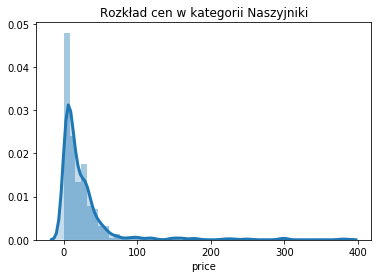

In [89]:
temp=data_oe.loc[data_oe.categories=="['Biżuteria i Zegarki', 'Biżuteria damska', 'Naszyjniki']", :].price
sns.distplot(temp, hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3}).set_title('Rozkład cen w kategorii Naszyjniki');

Sam algorytm (w pewnym uproszczeniu) ma natomiast dostęp do wartości oczekiwanej tego rozkładu, które nabiera sensu (całkiem sporego) przy dużej ilości obserwacji - stąd poniższy wynik.


In [88]:
regressor=XGBRegressor(random_state=1)
regressor.fit(X_train_oe, y_train_oe)
prediction=regressor.predict(X_test_oe)
x=sum(y_test_oe)
y=sum(prediction)
print('Rzeczywista wartość skumulowana: '+str(round(x, 2))+'PLN')
print('Przewidziana wartość skumulowana: '+str(round(y, 2))+'PLN')
print('Błąd prognozowania: '+str(round((x-y)/x*100, 2))+'%')

Rzeczywista wartość skumulowana: 5892547.95PLN
Przewidziana wartość skumulowana: 5801486.7PLN
Błąd prognozowania: 1.55%



Oprócz tego:

* Najlepiej, zarówno pod względem RMSE jak i R2, wypadł XGBoost, a najgorzej drzewo decyzyjne,
* techniki imputacji zmiennej main_category miały marginalny wpływ na jakość prognozowania,
* najszybszym algorytmem była regresja liniowa, zaraz za nią regresja bayesowska, nieco dalej drzewo decyzyjne, a na samym końcu znalazł się XGBoost